# My goal here is to Understand reinforcement learning from scratch so without using libraries and writing my own

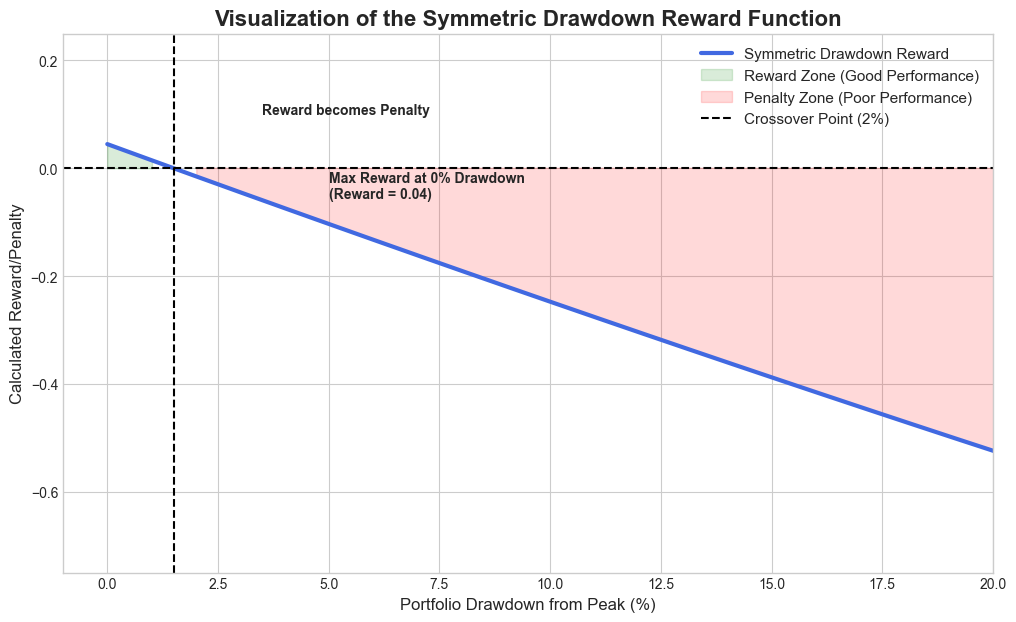

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import config
# --- Parameters from your config.py ---
DRAWDOWN_REWARD_WEIGHT = config.DRAWDOWN_REWARD_WEIGHT #1.5
DRAWDOWN_CROSSOVER = config.DRAWDOWN_CROSSOVER #0.15
DRAWDOWN_EXPONENT = config.DRAWDOWN_EXPONENT #2.0
# -----------------------------------------

# 1. Calculate the crossover value (the point where reward becomes 0)
# This is the score the agent gets exactly at the crossover drawdown percentage.
crossover_value = (1 - DRAWDOWN_CROSSOVER) ** DRAWDOWN_EXPONENT

# 2. Create a range of drawdown percentages from 0% to 100%
drawdown_percentages = np.linspace(0, 1, 100)

# 3. Calculate the reward for each drawdown percentage using the formula from enviorment.py
# This is the core logic you implemented.
raw_scores = (1 - drawdown_percentages) ** DRAWDOWN_EXPONENT
rewards = DRAWDOWN_REWARD_WEIGHT * (raw_scores - crossover_value)

# 4. Plot the results
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 7))

ax.plot(drawdown_percentages * 100, rewards, lw=3, color='royalblue', label='Symmetric Drawdown Reward')

# --- Annotations to explain the plot ---

# Highlight the reward zone
ax.fill_between(drawdown_percentages * 100, rewards, 0, where=rewards > 0,
                color='green', alpha=0.15, label='Reward Zone (Good Performance)')

# Highlight the penalty zone
ax.fill_between(drawdown_percentages * 100, rewards, 0, where=rewards < 0,
                color='red', alpha=0.15, label='Penalty Zone (Poor Performance)')

# Mark the crossover point
ax.axvline(DRAWDOWN_CROSSOVER * 100, color='black', linestyle='--', lw=1.5, label=f'Crossover Point ({DRAWDOWN_CROSSOVER:.0%})')
ax.axhline(0, color='black', linestyle='--', lw=1.5)

# Add text labels for key points
max_reward = DRAWDOWN_REWARD_WEIGHT * (1 - crossover_value)
ax.text(5, max_reward - 0.1, f'Max Reward at 0% Drawdown\n(Reward = {max_reward:.2f})',
        horizontalalignment='left', fontsize=10, weight='bold')
ax.text(DRAWDOWN_CROSSOVER * 100 + 2, 0.1, 'Reward becomes Penalty',
        horizontalalignment='left', fontsize=10, weight='bold')

# --- Formatting ---
ax.set_title('Visualization of the Symmetric Drawdown Reward Function', fontsize=16, weight='bold')
ax.set_xlabel('Portfolio Drawdown from Peak (%)', fontsize=12)
ax.set_ylabel('Calculated Reward/Penalty', fontsize=12)
ax.legend(fontsize=11)
ax.set_xlim(-1, 20)
ax.set_ylim(-.75, .25)

plt.show()


In [3]:
!pip install "gymnasium[box2d]"

  Using cached box2d-py-2.3.5.tar.gz (374 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached swig-4.3.1-py3-none-macosx_10_9_universal2.whl.metadata (3.5 kB)
Using cached swig-4.3.1-py3-none-macosx_10_9_universal2.whl (2.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 27.5 MB/s eta 0:00:00a 0:00:01
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp313-cp313-macosx_15_0_arm64.whl size=433413 sha256=c0e4c70d1b5a7f37e8bfe300dd28d0dc85d69e208586fe5edaf677e5a20c4531
  Stored in directory: /Users/amen/Library/Caches/pip/wheels/ac/ff/f1/2790d9b5c2f79b5fbece7d941e4d3f94ffab9993a7bcc610b3
Successfully built box2d-py
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [pygame]2m2/3 [pygame]


In [ ]:
import gymnasium as gym

# Initialise the environment
env = gym.make("LunarLander-v3", render_mode="human")

# Reset the environment to generate the first observation
observation, info = env.reset(seed=42)
for _ in range(1000):
    # this is where you would insert your policy
    print(f"{_} observation: {observation}")
    action = env.action_space.sample()
    print(f"{_} action: {action}")

    # step (transition) through the environment with the action
    # receiving the next observation, reward and if the episode has terminated or truncated
    observation, reward, terminated, truncated, info = env.step(action)

    # If the episode has ended then we can reset to start a new episode
    if terminated or truncated:
        observation, info = env.reset()

env.close()



/Users/amen/Documents/RL_MultiHeadAttention/.venv/lib/python3.13/site-packages/pygame/pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


0 observation: [ 0.00229702  1.4181306   0.23264714  0.32046658 -0.00265488 -0.05269808
  0.          0.        ]
0 action: 2
1 observation: [ 0.00443649  1.4258697   0.21735123  0.3439435  -0.00602619 -0.06743155
  0.          0.        ]
1 action: 1
2 observation: [ 0.00650253  1.433018    0.2081531   0.31769317 -0.00754774 -0.03043368
  0.          0.        ]
2 action: 2
3 observation: [ 0.00852213  1.4408861   0.20375998  0.3496893  -0.00932512 -0.0355509
  0.          0.        ]
3 action: 2
4 observation: [ 0.01069517  1.4496944   0.21839933  0.39147076 -0.0104131  -0.02176161
  0.          0.        ]
4 action: 3
5 observation: [ 0.01293488  1.4579082   0.22676954  0.36503622 -0.01317819 -0.05530696
  0.          0.        ]
5 action: 1
6 observation: [ 0.01507807  1.4655232   0.21465358  0.33844423 -0.01351076 -0.0066519
  0.          0.        ]
6 action: 0
7 observation: [ 0.01722116  1.4725384   0.21465361  0.3117759  -0.01384469 -0.00667932
  0.          0.        ]
7 acti

: 

In [1]:
info

NameError: name 'info' is not defined

In [1]:
import stable_baselines3 as sb3
# from stable_baselines3.common.env_util import make_vec_env
# from stable_baselines3.common.vec_env import VecEnv
# from stable_baselines3.common.vec_env import VecMonitor
# from stable_baselines3.common.vec_env import VecNormalize
# from stable_baselines3.common.vec_env import VecFrameStack
# from stable_baselines3.common.vec_env import VecEnvWrapper
# from stable_baselines3.common.vec_env import VecEnvWrapper

from stable_baselines3.ddpg import DDPG

In [ ]:
DDPG.

TypeError: DDPG.__init__() missing 2 required positional arguments: 'policy' and 'env'